## Import necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout

In [3]:
df = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Downloads\data\demo_data\7.xor.csv", header = None)

## Performing little bit of EDA

In [4]:
df.columns = ['feature_1', 'feature_2','output'] #changing the columns name to more readable ones.

In [5]:
df.head()

,feature_1,feature_2,output
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [6]:
df.head()

,feature_1,feature_2,output
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [7]:
df.isna().sum() # no missing values

feature_1    0
feature_2    0
output       0
dtype: int64

In [8]:
df['output'].value_counts(normalize=True) # there is no imbalance

-1.0    0.52
 1.0    0.48
Name: output, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  500 non-null    float64
 1   feature_2  500 non-null    float64
 2   output     500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [10]:
df.describe(include='all')

,feature_1,feature_2,output
count,500.000000,500.000000,500.0000
mean,-0.065366,-0.025148,-0.0400
std,0.974521,1.000935,1.0002
min,-2.659172,-3.046143,-1.0000
25%,-0.726459,-0.680994,-1.0000
50%,-0.094417,-0.034669,-1.0000
75%,0.593690,0.609228,1.0000
max,2.696224,2.759355,1.0000


## Feature Engineering

In [11]:
df['feature_3']= np.sin(df.feature_1)

In [12]:
df['feature_4'] = np.sin(df.feature_2)

In [13]:
df

,feature_1,feature_2,output,feature_3,feature_4
0,1.764052,0.400157,-1.0,0.981384,0.389563
1,0.978738,2.240893,-1.0,0.829794,0.783762
2,1.867558,-0.977278,1.0,0.956288,-0.828978
3,0.950088,-0.151357,1.0,0.813467,-0.150780
4,-0.103219,0.410599,1.0,-0.103036,0.399158
...,...,...,...,...,...
495,0.441033,0.178793,-1.0,0.426874,0.177842
496,-0.799422,0.240788,1.0,-0.716954,0.238467
497,0.289121,0.412871,-1.0,0.285109,0.401241
498,-0.198399,0.094192,1.0,-0.197100,0.094053


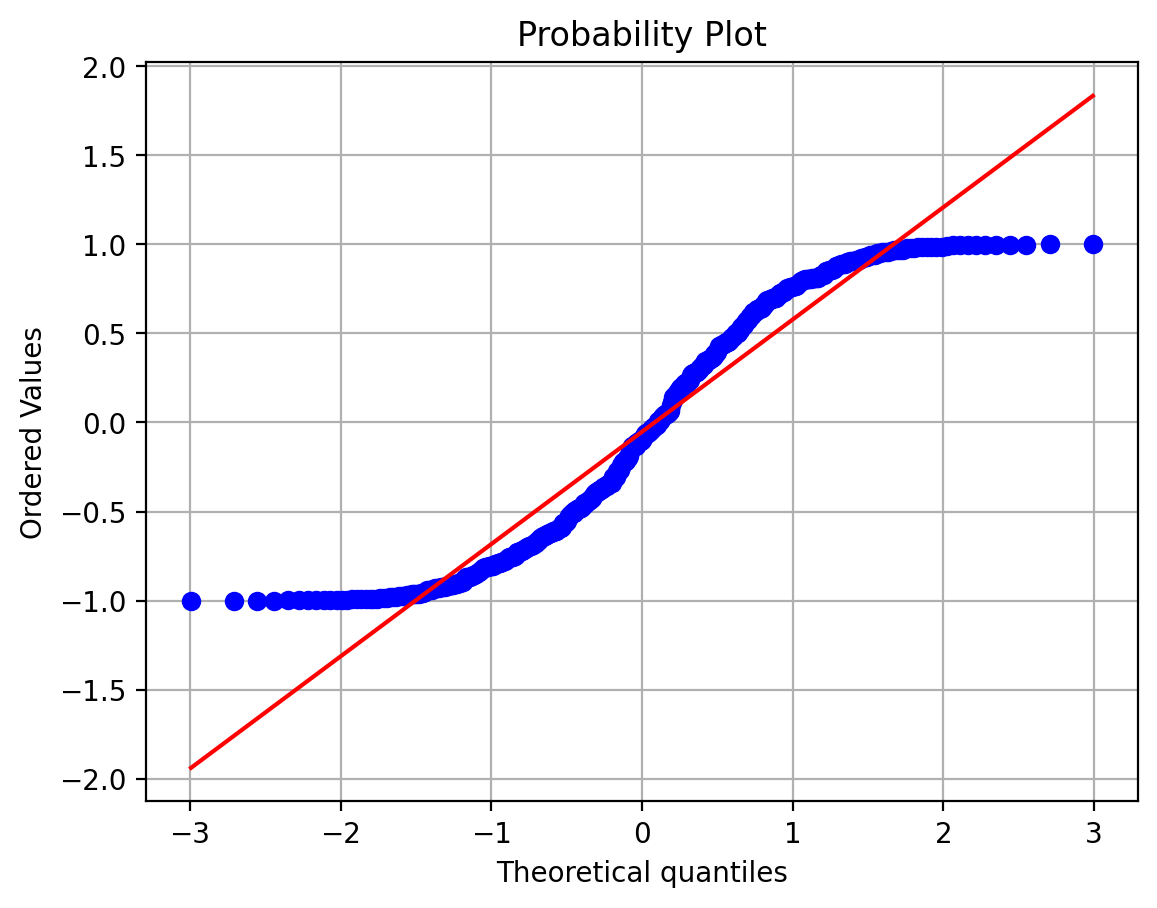

In [14]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_3'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_3  is not having normal distribution since it is sine function

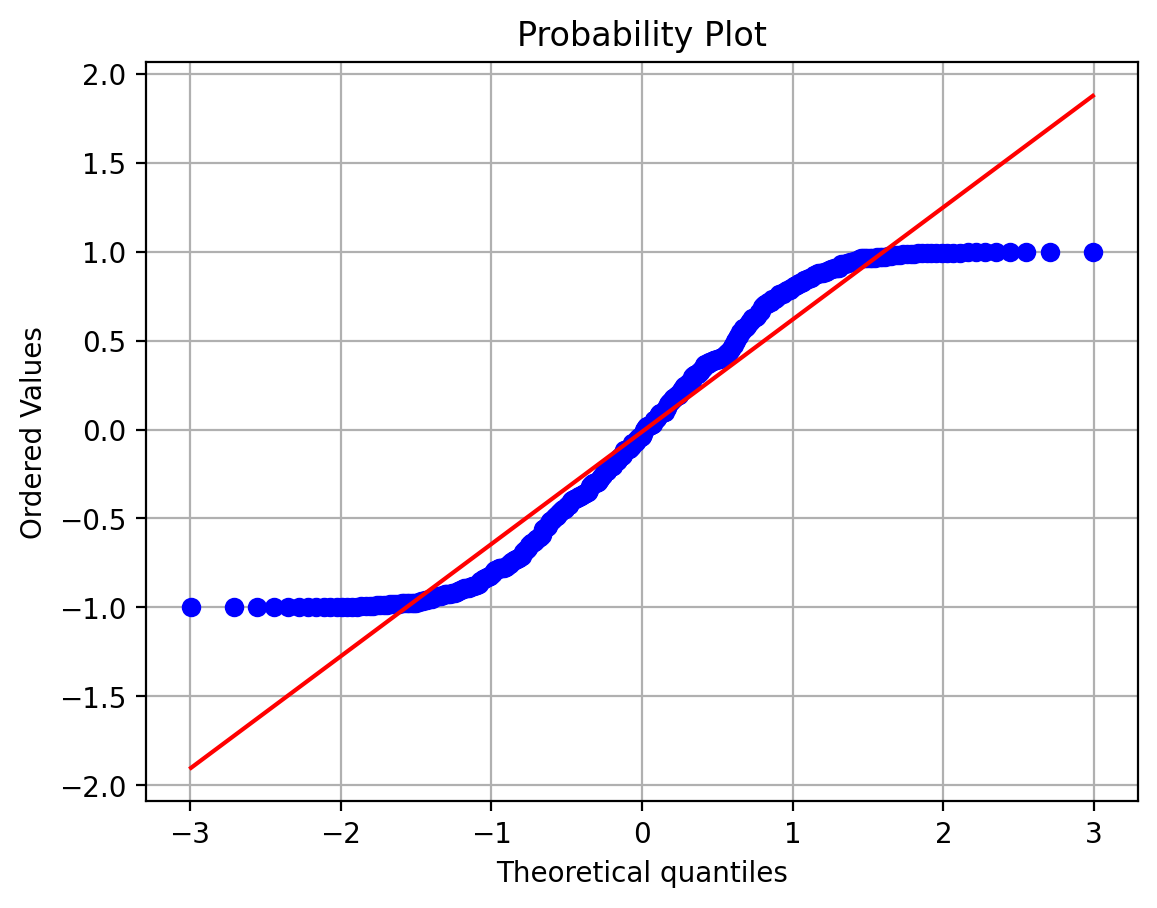

In [15]:
# 1.QQ plot
from scipy import stats
stats.probplot(df['feature_4'], dist='norm', plot = plt)
plt.grid();

### Intution:
* As you can observe that our input feature : feature_4  is not having normal distribution since it is sine function

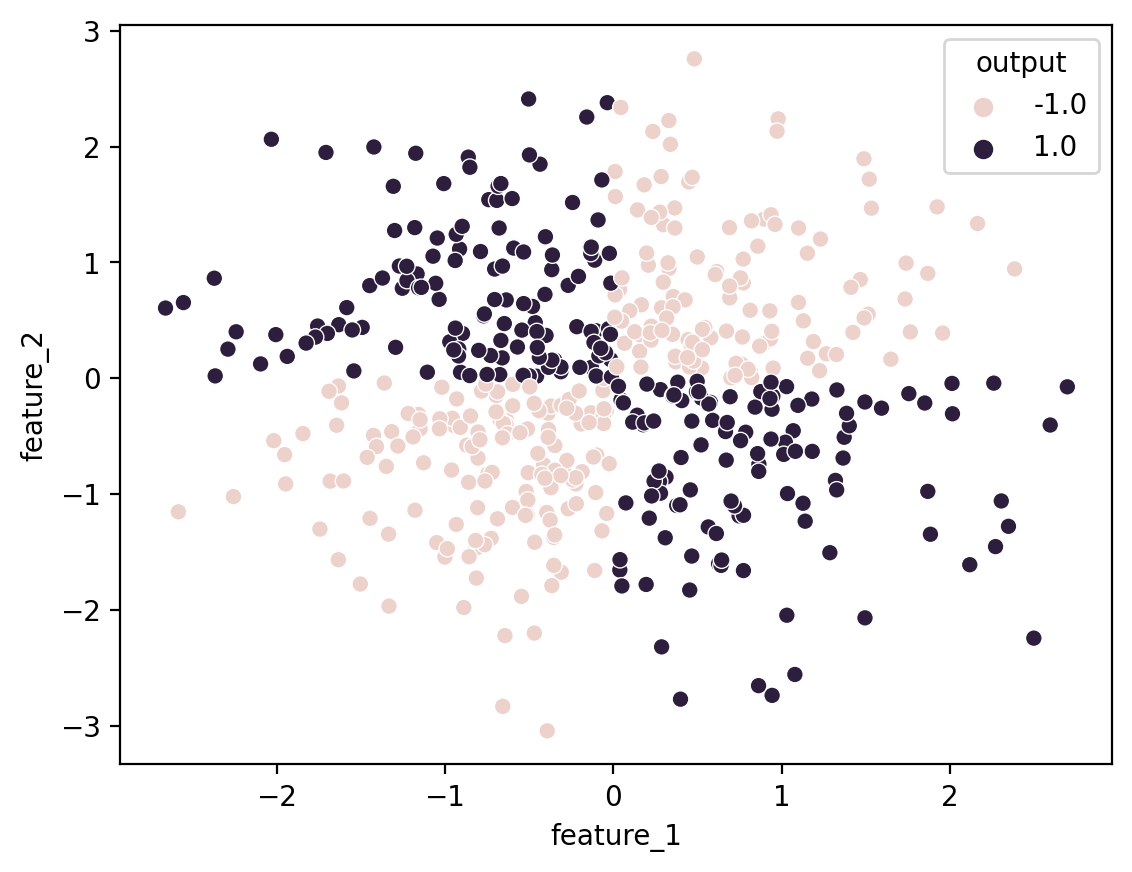

In [16]:
sns.scatterplot(x = 'feature_1',y='feature_2', hue = 'output', data = df);

### Intution
* clearly we can observe that there is some sort of linearity in our data
* We can observe that the data is in form of a cross(X)

## Segregation of input and output features

In [26]:
X = df[['feature_3','feature_4']]
y=df['output']

## Spliting the data into train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)

## Data preprocessing of train and test data

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trns=sc.fit_transform(X_train)

In [29]:
X_test_trns = sc.transform(X_test)

## Building the Architecture

In [30]:
model = Sequential()
model.add(Dense(6,activation='tanh', kernel_initializer= 'random_normal', input_dim = 2))
model.add(Dense(4,activation='tanh', kernel_initializer= 'random_normal'))
model.add(Dense(3,activation='tanh', kernel_initializer= 'random_normal'))
model.add(Dense(2,activation='tanh', kernel_initializer= 'random_normal'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 18        
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


## Compiling the Architecture & Model Creation

In [44]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Model Training Phase

In [45]:
history = model.fit(X_train.values,y_train,epochs =300,validation_split = 0.2 )

Epoch 1/300
10/10 [==============================] - 1s 26ms/step - loss: -3.1738 - accuracy: 0.1875 - val_loss: -3.2734 - val_accuracy: 0.1250
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: -3.2087 - accuracy: 0.1875 - val_loss: -3.3584 - val_accuracy: 0.1250
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: -3.2191 - accuracy: 0.1875 - val_loss: -3.4416 - val_accuracy: 0.1250
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: -3.2236 - accuracy: 0.1875 - val_loss: -3.4543 - val_accuracy: 0.1250
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: -3.2288 - accuracy: 0.1875 - val_loss: -3.4402 - val_accuracy: 0.1250
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: -3.2330 - accuracy: 0.1875 - val_loss: -3.4260 - val_accuracy: 0.1250
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: -3.2380 - accuracy: 0.1875 - val_loss: -3.4315 - val_accuracy: 0.125

## Prediction Phase

In [46]:
Y_cap = model.predict(X_test_trns)

4/4 [==============================] - 0s 5ms/step


In [47]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [48]:
Y_cap_f

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

## Model Evaluation

In [49]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.17

## Ploting the Best Decision Surface Region

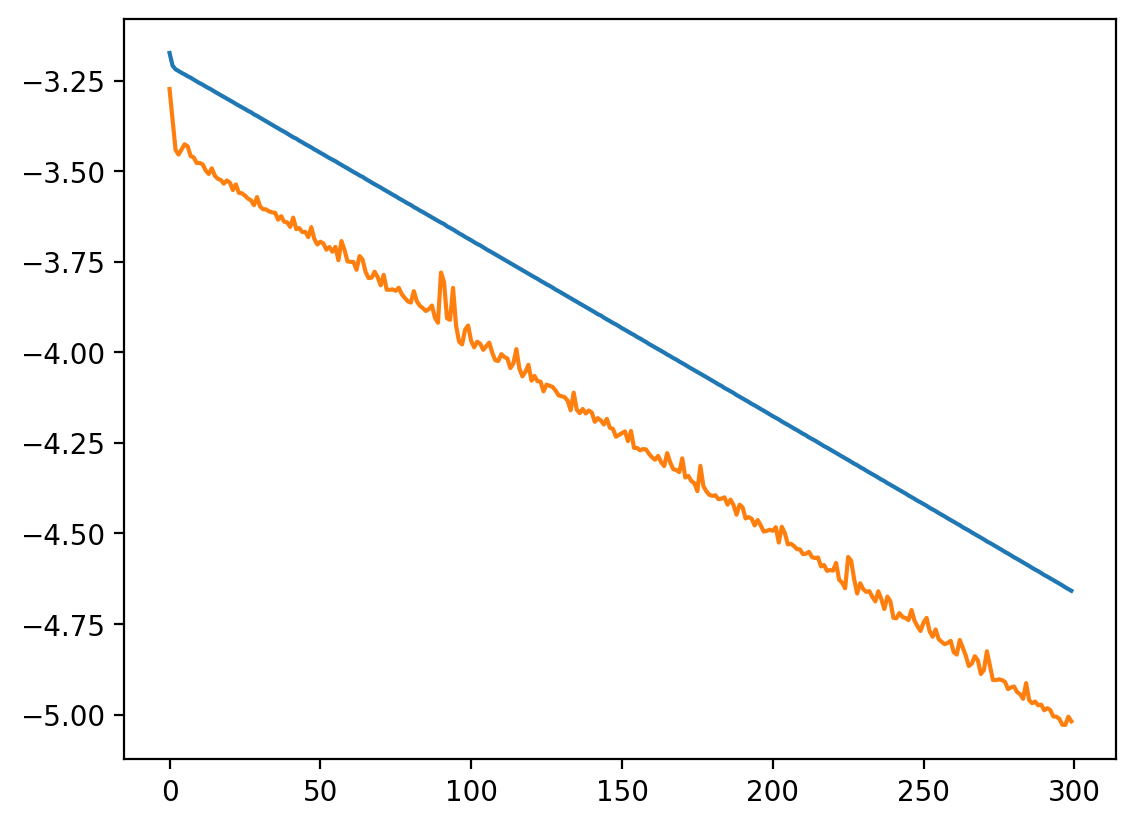

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [51]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 14s 1ms/step


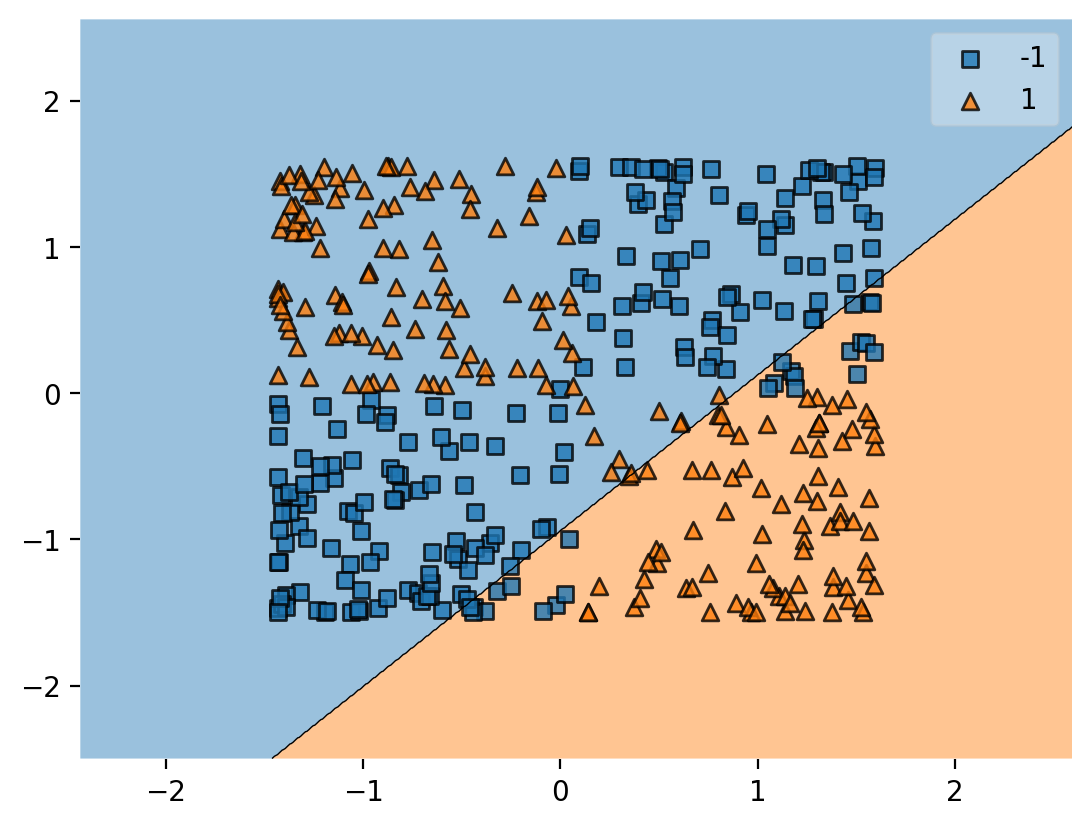

In [52]:
plot_decision_regions(X_train_trns, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 14s 1ms/step


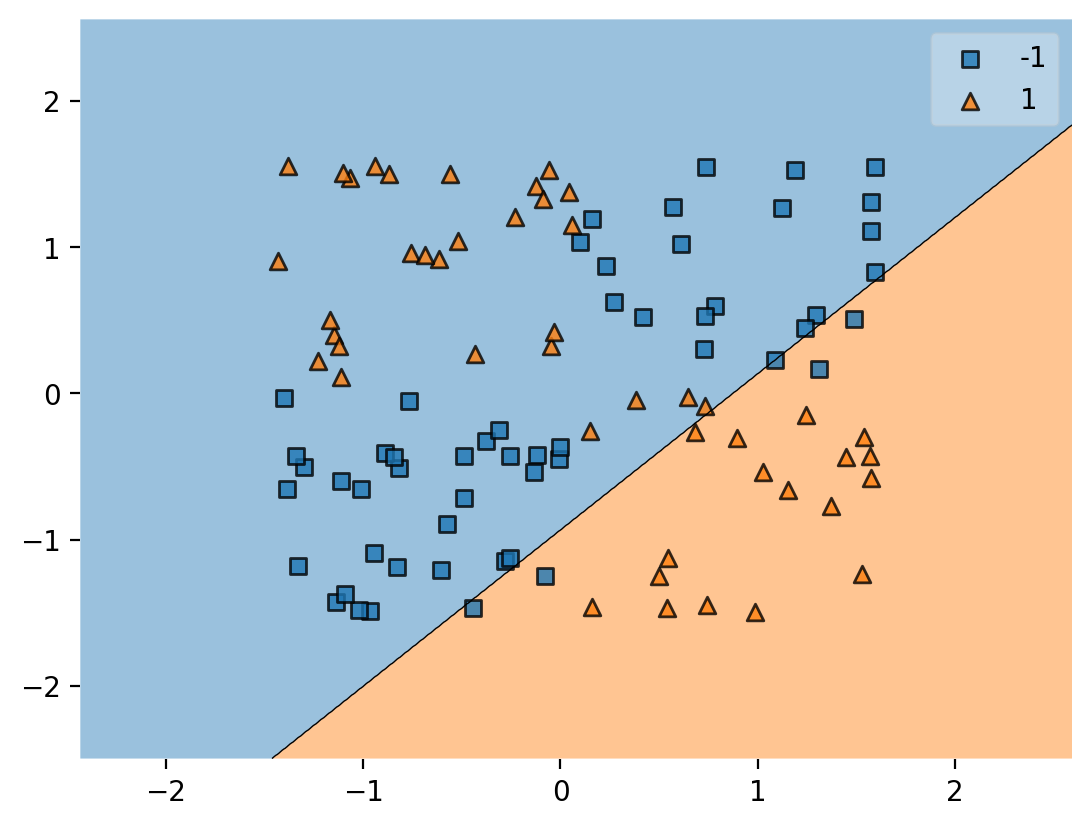

In [43]:
plot_decision_regions(X_test_trns, y_test.values.astype(int), clf = model);